In [20]:
import pandas as pd
import re
import seaborn as sns

In [2]:
df = pd.read_csv('dadosCompletos.csv')

In [61]:
df.loc[0, 'adversario'] = 0
df['adversario'] = df['adversario'].astype(int)
df.sort_values(by=['adversario'], ignore_index=True, inplace=True)
df.loc[0, 'adversario'] = 'humano'
df['vencedor'].replace({'jogador': 'oponente'}, inplace=True)

In [62]:
df

,corIa,vencedor,adversario,qtdLances,lancesIdeais,mediaNos,mediaTempo,medianaTempo,stdTempo
0,pretas,ia,humano,39,29,303391,101.346921,79.671114,109.249080
1,brancas,ia,400,46,32,48221,11.021502,7.685231,11.269173
2,pretas,ia,400,33,26,103990,42.840178,10.867545,90.309308
3,brancas,ia,400,19,15,35855,8.416498,5.701564,9.467896
4,pretas,ia,400,39,28,57620,13.320453,10.553781,12.964498
5,brancas,ia,400,28,22,40457,10.295321,5.009054,14.590288
6,pretas,ia,400,31,23,53450,56.962129,9.171827,253.177631
7,brancas,oponente,700,18,11,37846,7.752883,6.844109,7.843070
8,pretas,ia,700,46,32,95883,23.504642,18.680655,20.802030
9,pretas,empate,700,68,53,38353,8.546708,1.194495,13.733441


In [63]:
df['mediaNos'].mean(), df['mediaNos'].median(), df['mediaNos'].std()

(55382.89189189189, 40457.0, 47900.51115407143)

In [96]:
df['mediaTempo'].mean(), df['stdTempo'].mean()

(17.72819361415233, 27.18835945818479)

In [97]:
df['mediaTempo'].std()

17.53029540330614

In [95]:
df['mediaTempo'].max(), df['mediaTempo'].min()

(101.34692138891954, 4.433772140741349)

<Axes: xlabel='mediaTempo'>

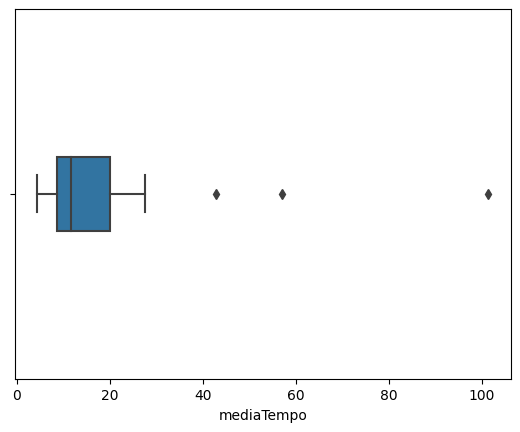

In [109]:
sns.boxplot(x="mediaTempo", data=df, width=0.2)

In [94]:
df['qtdLances'].mean(), df['qtdLances'].std()

(56.729729729729726, 31.955393083909126)

In [67]:
df['qtdLances'].max(), df['qtdLances'].min()

(146, 18)

In [68]:
df['lancesIdeais'].mean()

41.32432432432432

In [92]:
df['vencedor'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%' 

vencedor
ia          62.2%
empate      21.6%
oponente    16.2%
Name: proportion, dtype: object

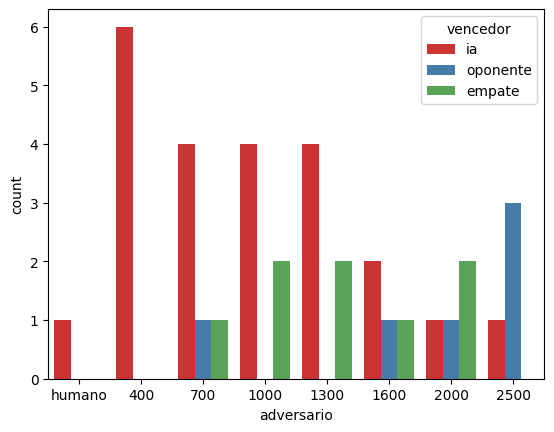

In [93]:
sns.countplot(x='adversario', hue='vencedor', data=df, palette='Set1');

In [70]:
df.groupby(['adversario']).vencedor.value_counts()

adversario  vencedor
400         ia          6
700         ia          4
            empate      1
            oponente    1
1000        ia          4
            empate      2
1300        ia          4
            empate      2
1600        ia          2
            empate      1
            oponente    1
2000        empate      2
            ia          1
            oponente    1
2500        oponente    3
            ia          1
humano      ia          1
Name: count, dtype: int64

In [71]:
df.groupby(['corIa']).vencedor.value_counts()

corIa    vencedor
brancas  ia          12
         oponente     4
         empate       2
pretas   ia          11
         empate       6
         oponente     2
Name: count, dtype: int64

In [72]:
df.groupby(['adversario']).qtdLances.mean(), df.groupby(['adversario']).lancesIdeais.mean()

(adversario
 400       32.666667
 700       43.500000
 1000      67.666667
 1300      57.333333
 1600      41.500000
 2000      81.250000
 2500      90.500000
 humano    39.000000
 Name: qtdLances, dtype: float64,
 adversario
 400       24.333333
 700       32.166667
 1000      49.500000
 1300      40.333333
 1600      30.000000
 2000      56.500000
 2500      69.000000
 humano    29.000000
 Name: lancesIdeais, dtype: float64)